## Modelling##

In [1]:

# General Libraries
import pandas as pd
import numpy as np
from itertools import product
import warnings
from tqdm import tqdm

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing, modelling & evaluation
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,  accuracy_score, precision_recall_fscore_support
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Language Processing
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import describe,skew

In [2]:
#import data from previous notebook
X_subset = pd.read_csv('X_subset.csv')

In [3]:
X_subset.shape

(233154, 36)

Creating X and Y

In [4]:
y = X_subset['loan_default']

In [5]:
X = X_subset.drop('loan_default', axis =1)

## Classification Model

In [6]:
#**find columns with low variance!**
low_var_columns = []
for column in list(X.columns):
    if np.max(X[column].value_counts(normalize=True)) > 0.99:
        low_var_columns.append(column)
low_var_columns

['Passport_flag', 'SEC.INSTAL.AMT']

In [7]:
X.columns

Index(['disbursed_amount', 'asset_cost', 'Date.of.Birth', 'DisbursalDate',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'Bureau_description',
       'PRI.DISBURSED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'average_act_age_in_months', 'credit_history_length_in_months',
       'no_of_accts', 'pri_inactive_accts', 'sec_inactive_accts',
       'total_inactive_accts', 'total_overdue_accts', 'total_current_balance',
       'total_sanctioned_amount', 'total_disbursed_amount',
       'total_installment', 'loan_to_asset_ratio', 'pri_tenure', 'sec_tenure',
       'Salaried', 'Self employed', 'unknown'],
      dtype='object')

In [8]:
X.dtypes

disbursed_amount                         int64
asset_cost                               int64
Date.of.Birth                          float64
DisbursalDate                          float64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
Bureau_description                       int64
PRI.DISBURSED.AMOUNT                     int64
SEC.DISBURSED.AMOUNT                     int64
PRIMARY.INSTAL.AMT                       int64
SEC.INSTAL.AMT                           int64
NEW.ACCTS.IN.LAST.SIX.MONTHS             int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      int64
NO.OF_INQUIRIES                          int64
average_act_age_in_months                int64
credit_history_length_in_months          int64
no_of_accts                              int64
pri_inactive_

Split the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((186523, 35), (46631, 35), (186523,), (46631,))

In [10]:
max(y.mean(), 1 - y.mean())

0.7829288796246258

Baseline -- 78.3%

## Logistic Regression

In [11]:
lr= LogisticRegression()
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [12]:
lr.fit(X_train, y_train)
## Predict
pred_train_lr = lr.predict(X_train)
pred_test_lr = lr.predict(X_test)

### Train data accuracy
from sklearn.metrics import accuracy_score
print("Accuracy on train is:", accuracy_score(y_train, pred_train_lr))
      
### Test data accuracy
print("Accuracy on test is:", accuracy_score(y_test, pred_test_lr))

Accuracy on train is: 0.783099135227291
Accuracy on test is: 0.7822478608650898


AUC score

In [13]:
print(roc_auc_score(y_train, pred_train_lr))
print(roc_auc_score(y_test, pred_test_lr))

0.500008935690601
0.5


## PCA

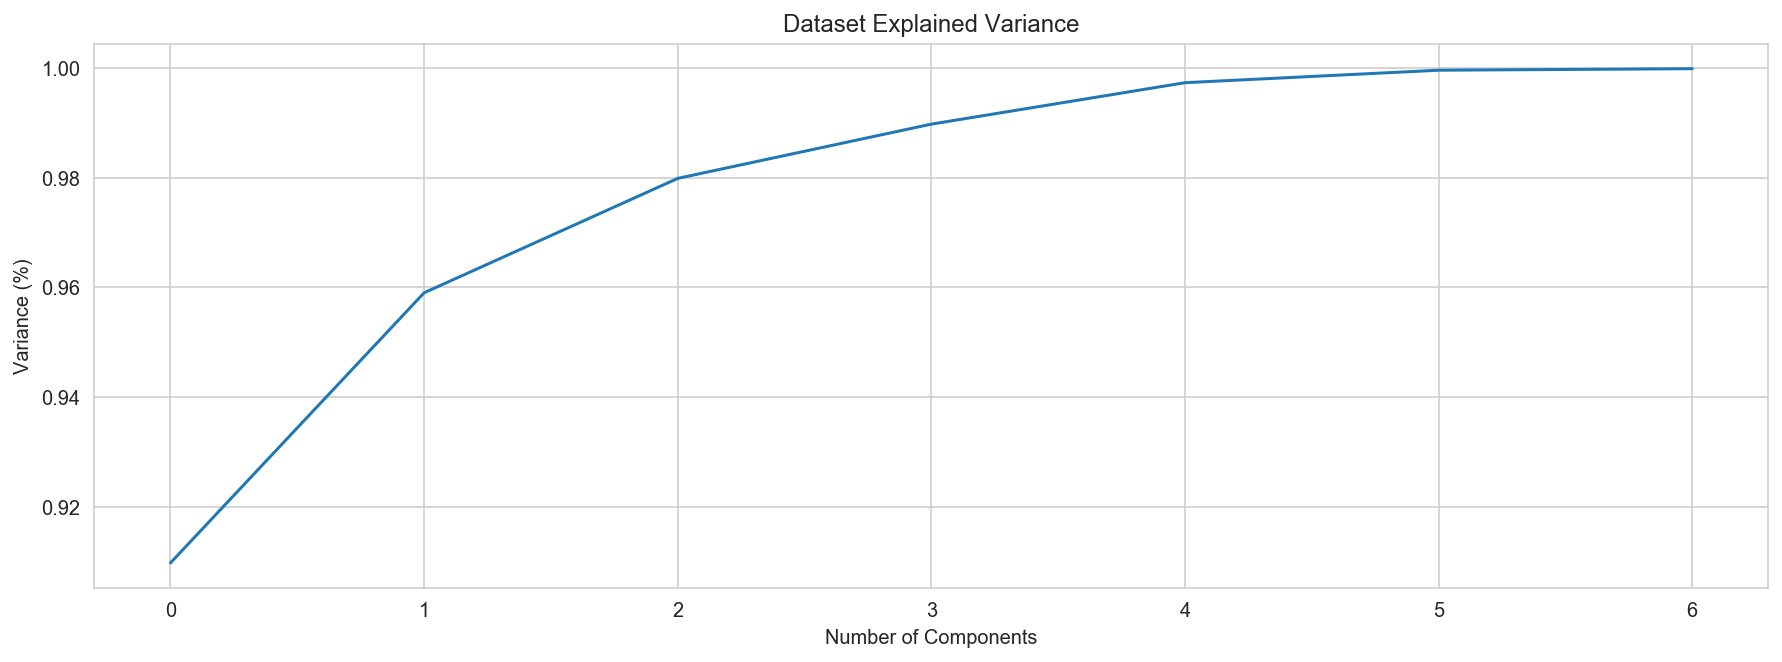

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7).fit(X)
X = pca.fit_transform(X)
X = pd.DataFrame(X, columns = ['p1','p2','p3','p4','p5','p6','p7'])
test_df = pd.DataFrame(pca.fit_transform(X_test), columns = ['p1','p2','p3','p4','p5','p6','p7'])
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [15]:
def train_model(model):
    # Checking accuracy
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('accuracy_score',accuracy_score(y_test, pred))
    print('recall_score',recall_score(y_test, pred))
    print('f1_score',f1_score(y_test, pred))
    print('roc_auc_score',roc_auc_score(y_test, pred))
    # confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    return model

## Random Forest Classifier

In [16]:
# train model random forest
rfc = RandomForestClassifier()
rfc = train_model(rfc)

accuracy_score 0.7759859321052519
recall_score 0.03594642505416584
f1_score 0.06531853972798854
roc_auc_score 0.5089675377182994
confusion_matrix
       0    1
0  35820  657
1   9789  365


I will use Random Forest model for feature importance

I define a few functions to make analysis more convenient and presentable

In [17]:
# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

Hypertuning parameter

## Benchmark model

I train a plain Random Forest model to have a benchmark. I set a random_state to ensure results comparability. I also use bootstrap and set oob_score = True to later use the out-of-bag error.

Briefly, each tree in the random forest is trained on a different dataset, sampled with replacement from the original data. This results in around ~2/3 of distinct observations in each training set. The out-of-bag error is calculated on all the observations, but for calculating each row's error the model only considers trees which have not seen this row during training. This is similar to evaluating the model on a validation(test) set.add

In [18]:
rfc_gs = RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rfc_gs.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Testing Score: {:.2f}'.format(rfc_gs.score(X_train, y_train), 
                                                                                    rfc_gs.oob_score_,
                                                                                    rfc_gs.score(X_test, y_test)))

R^2 Training Score: 1.00 
OOB Score: 0.77 
R^2 Testing Score: 0.78


Well, there is no overfitting in the model, as it performs well on OOB sample and on the test set which is good. Let's move forward to feature importances (measured on the training set performance). Some of the approaches can also be used for testing/OOB sets, to gain further interpretability on the unseen data.

## Overall feature importances

By overall feature importances I mean the ones derived at model level, i.e., saying that in a given model these features are most important in explaining the target variable.

## Default Scikit-learn's feature importances

Let's start with decision trees to build some intuition. In decision trees, every node is a condition how to split values in a single feature, so that similar values of dependent variable end up in the same set after the split. The condition is based on impurity, which in case of classification problems is Gini impurity / information gain (entropy), while for regression trees its variance. So when training a tree we can compute how much each feature contributes to decreasing the weighted impurity. feature_importances_ in Scikit-Learn is based on that logic, but in case of Random Forest we are talking about averaging the decrease in impurity over trees.

Pros:

fast calculation easy to retrieve - one command

Cons:

biased approach, as it has a tendency to inflate the importance of continuous features or high-cardinality categorical variables

In [20]:
base_imp = imp_df(X_train.columns, rfc_gs.feature_importances_)
base_imp

,feature,feature_importance
0,loan_to_asset_ratio,0.144523
1,asset_cost,0.136673
2,Date.of.Birth,0.136047
3,disbursed_amount,0.132951
4,DisbursalDate,0.106452
5,PERFORM_CNS.SCORE,0.026134
6,credit_history_length_in_months,0.026108
7,total_current_balance,0.024921
8,average_act_age_in_months,0.024539
9,total_sanctioned_amount,0.022653


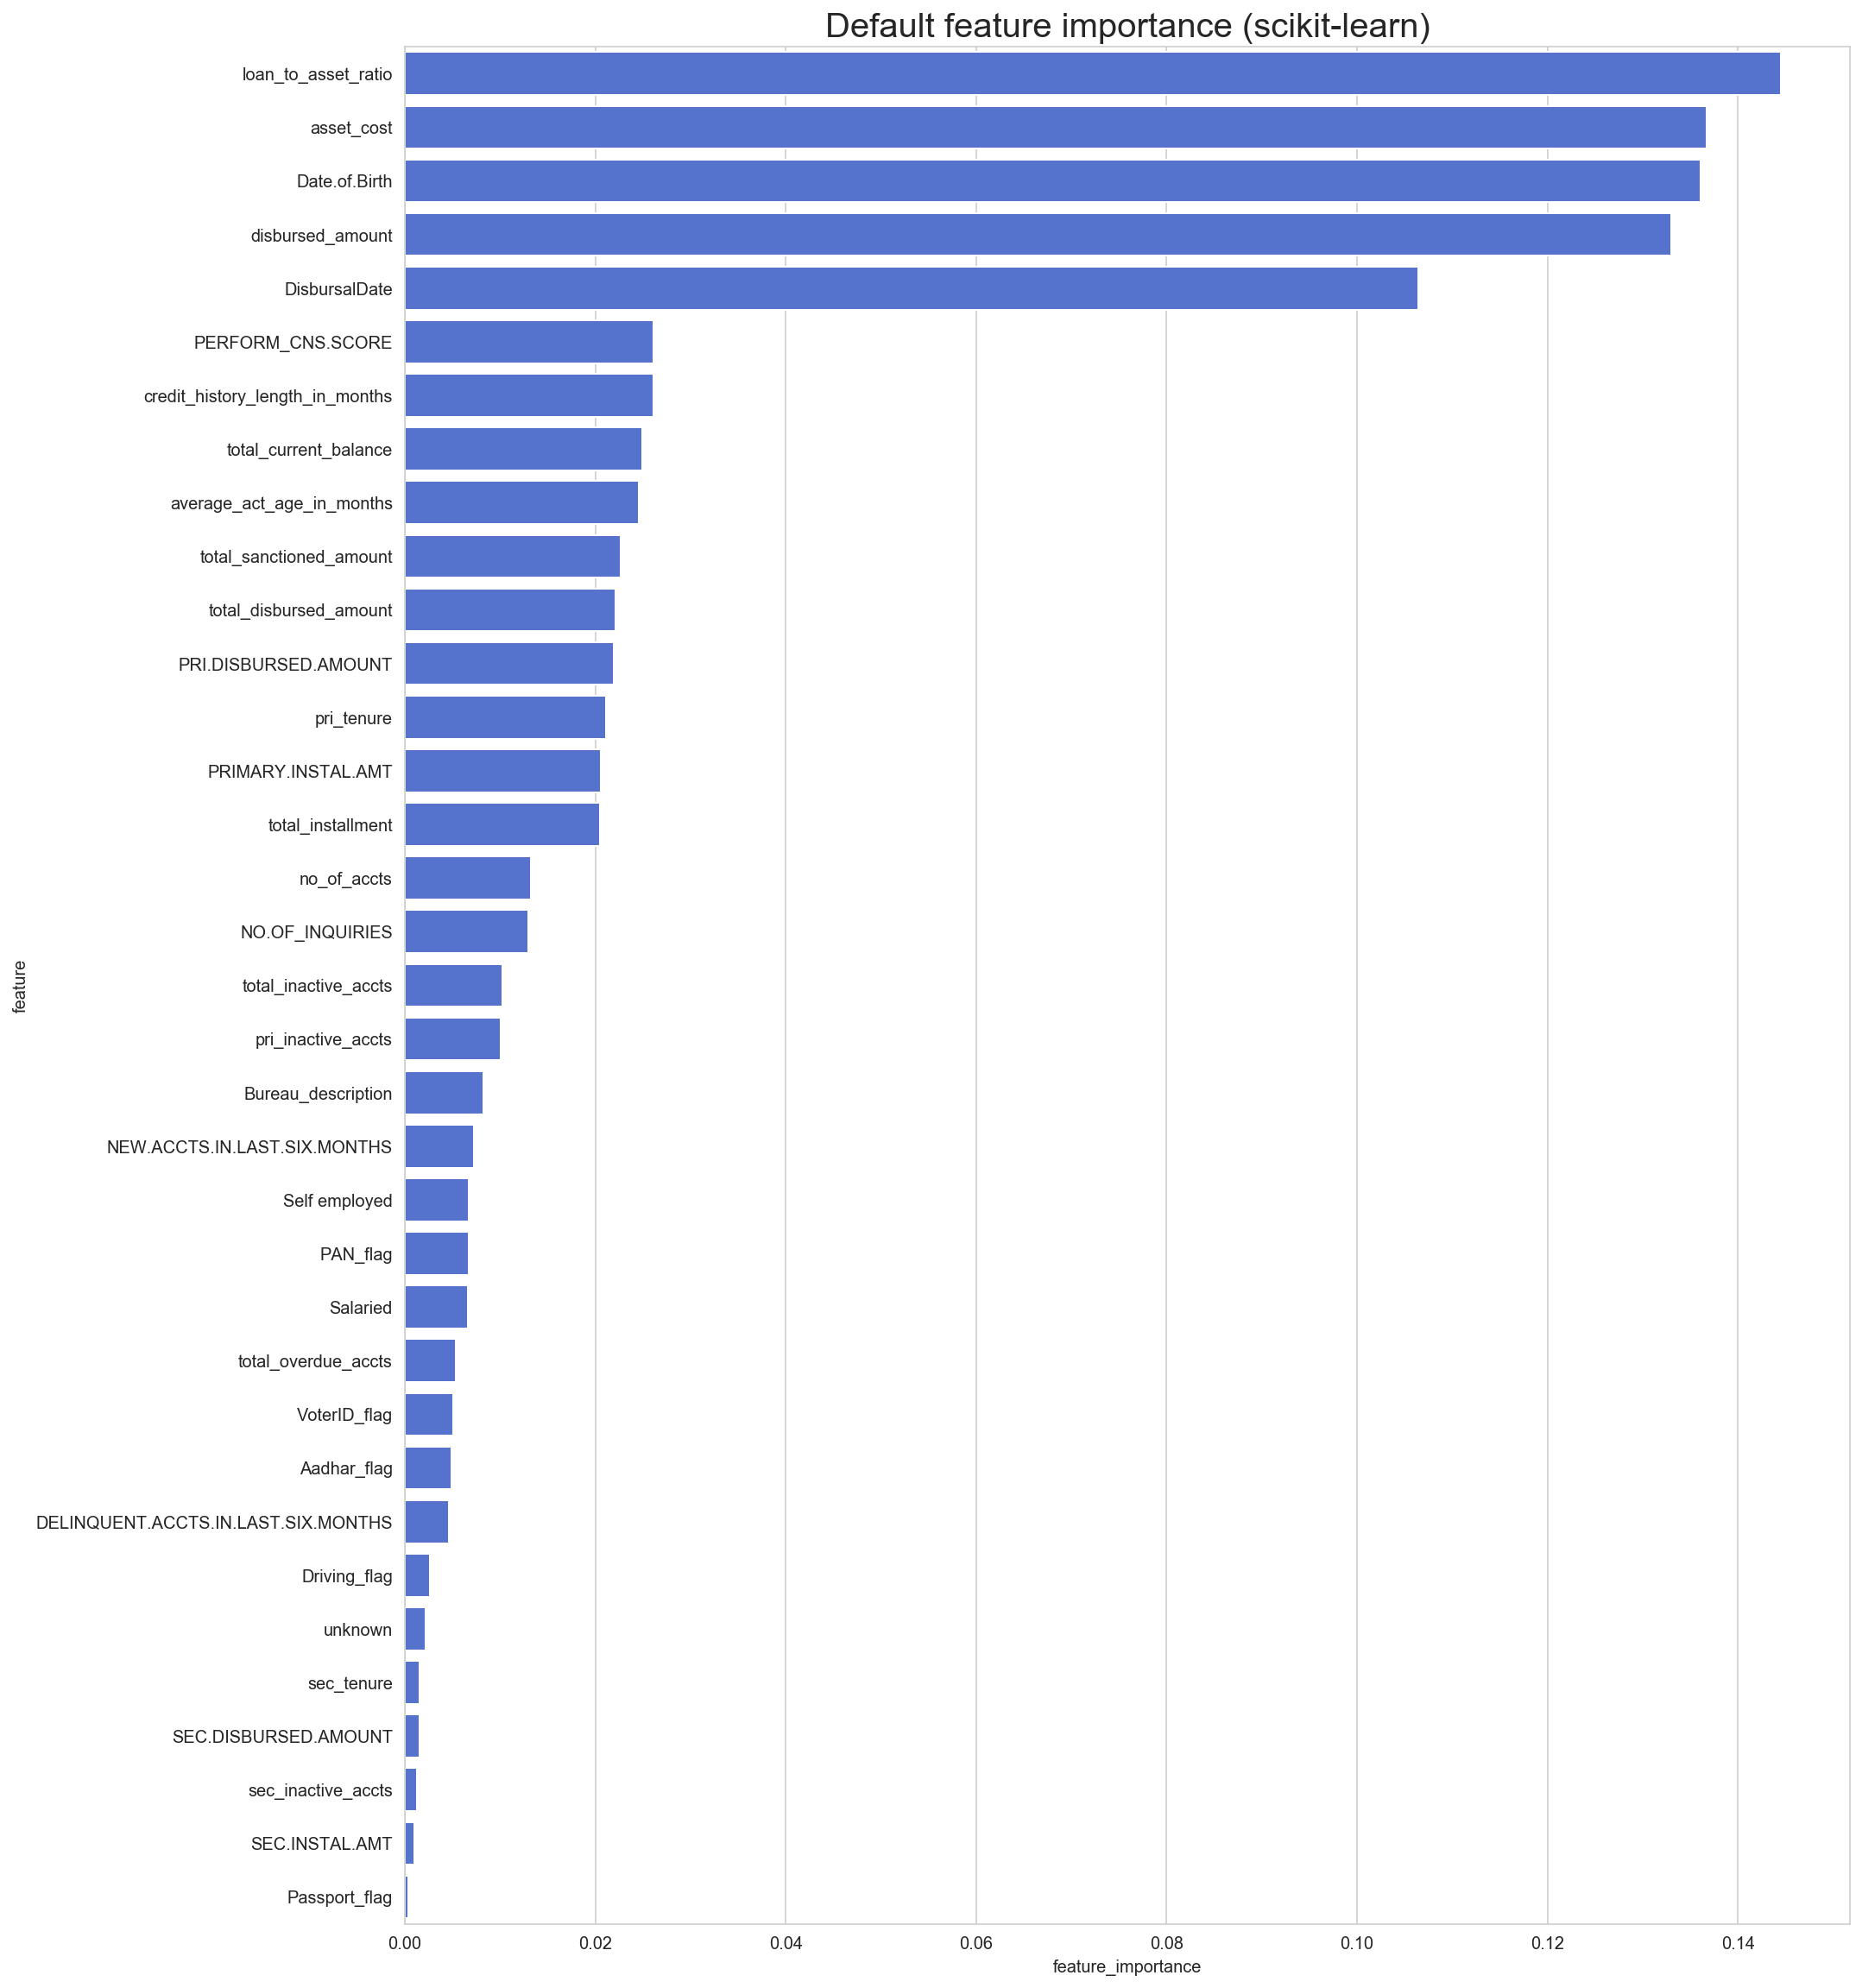

In [21]:
fig = plt.figure(figsize=(15,20))
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

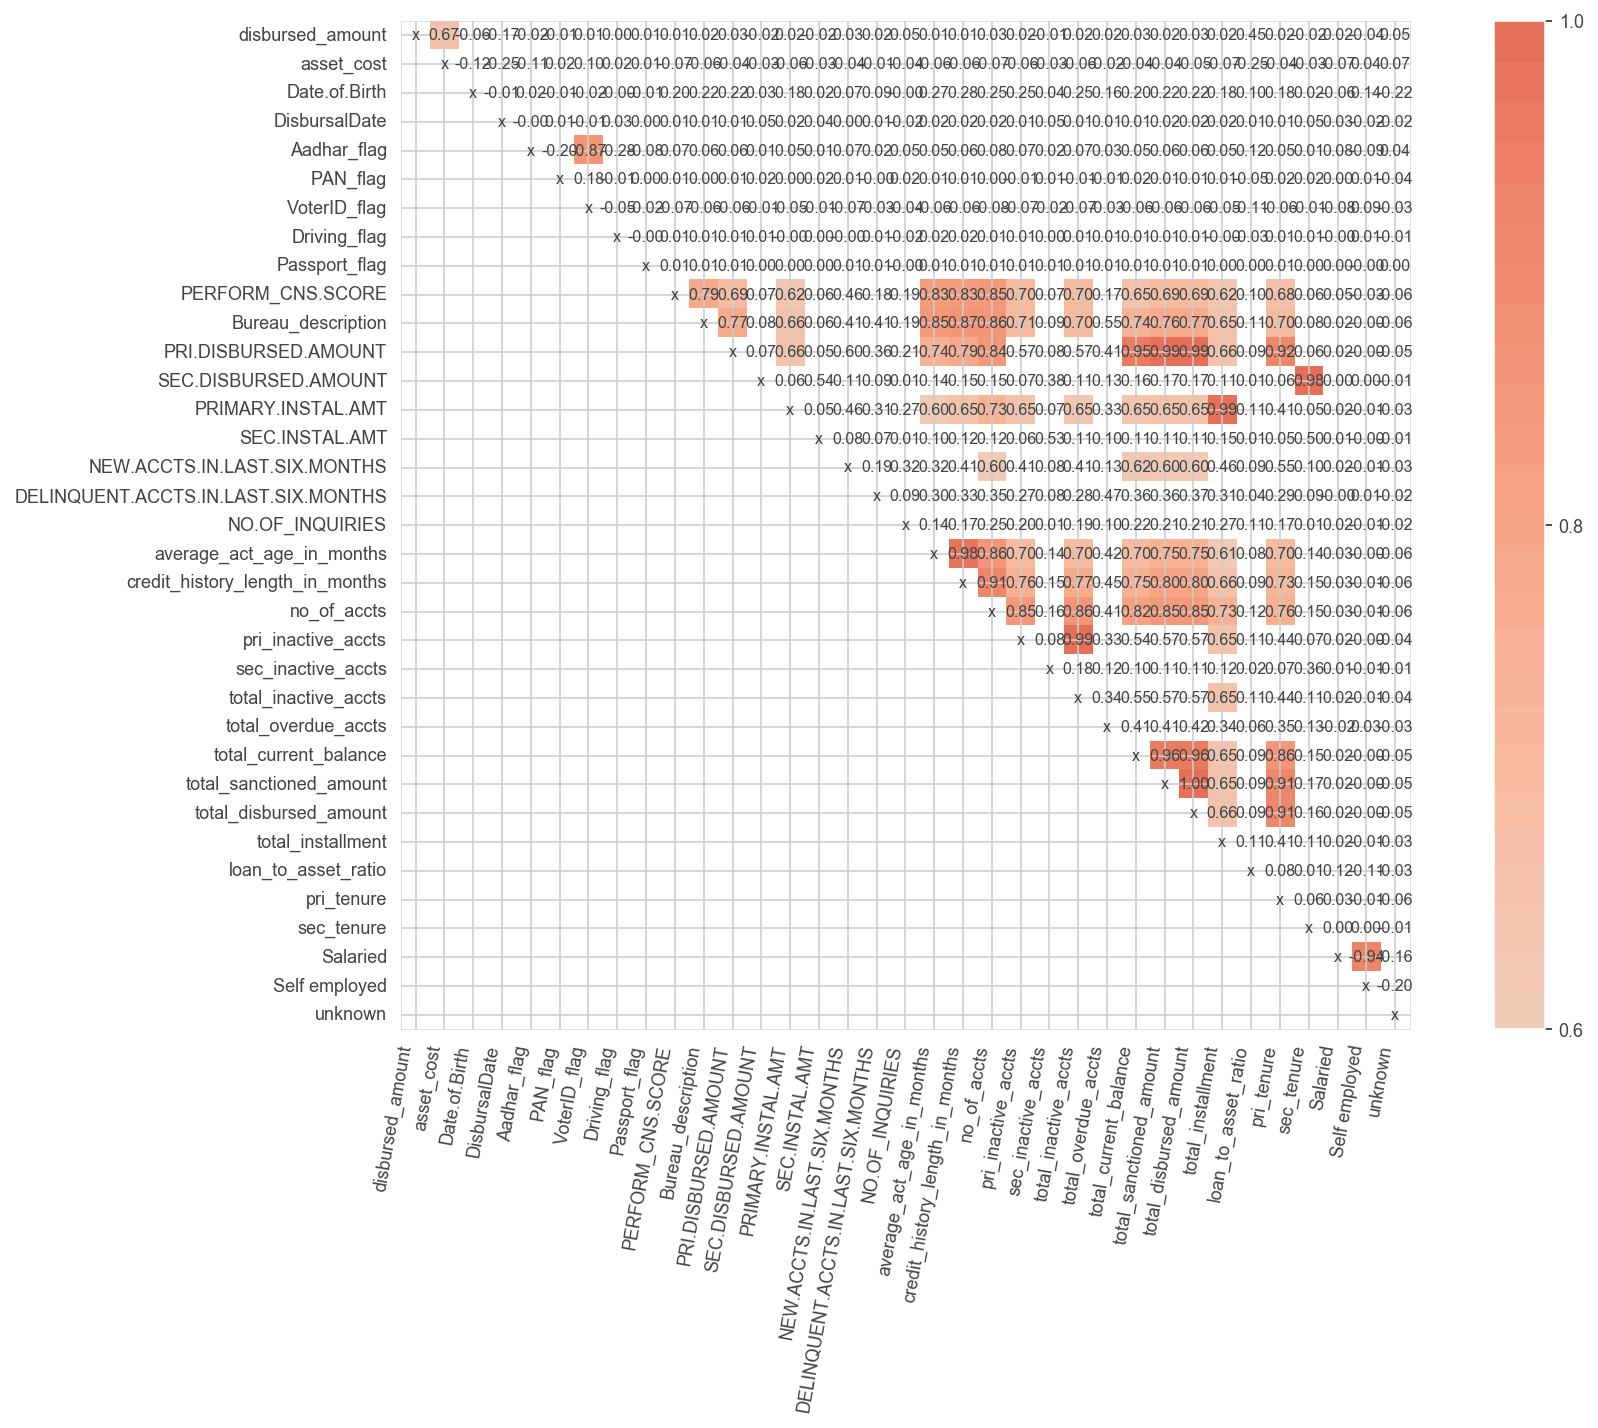

In [22]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X_train, figsize=(15,10))
viz.view()

## Permutation feature importance

This approach directly measures feature importance by observing how random re-shuffling (thus preserving the distribution of the variable) of each predictor influences model performance.

The approach can be described in the following steps:

Train the baseline model and record the score (accuracy/R^2/any metric of importance) by passing validation set (or OOB set in case of Random Forest). This can also be done on the training set, at the cost of sacrificing information about generalisation. Re-shuffle values from one feature in the selected dataset, pass the dataset to the model again to obtain predictions and calculate the metric for this modified dataset. The feature importance is the difference between the benchmark score and the one from the modified (permuted) dataset. Repeat 2. for all feature in the dataset.

Pros:

applicable to any model reasonably efficient reliable technique no need to retrain the model at each modification of the dataset

Cons:

more computationally expensive than default feature_importances permutation importance overestimates the importance of correlated predictors - Strobl et al (2008) As for the second problem with this method, I have already plotted the correlation matrix above. However, I will use a function from one of the libraries I use to visualise Spearman's correlations. The difference between standard Pearson's correlation is that this one first transforms variables into ranks and only then runs Pearson's correlation on the ranks.

Spearman's correlation:

-is nonparametric -does not assume linear relationship between variables -it looks for monotonic relationships.

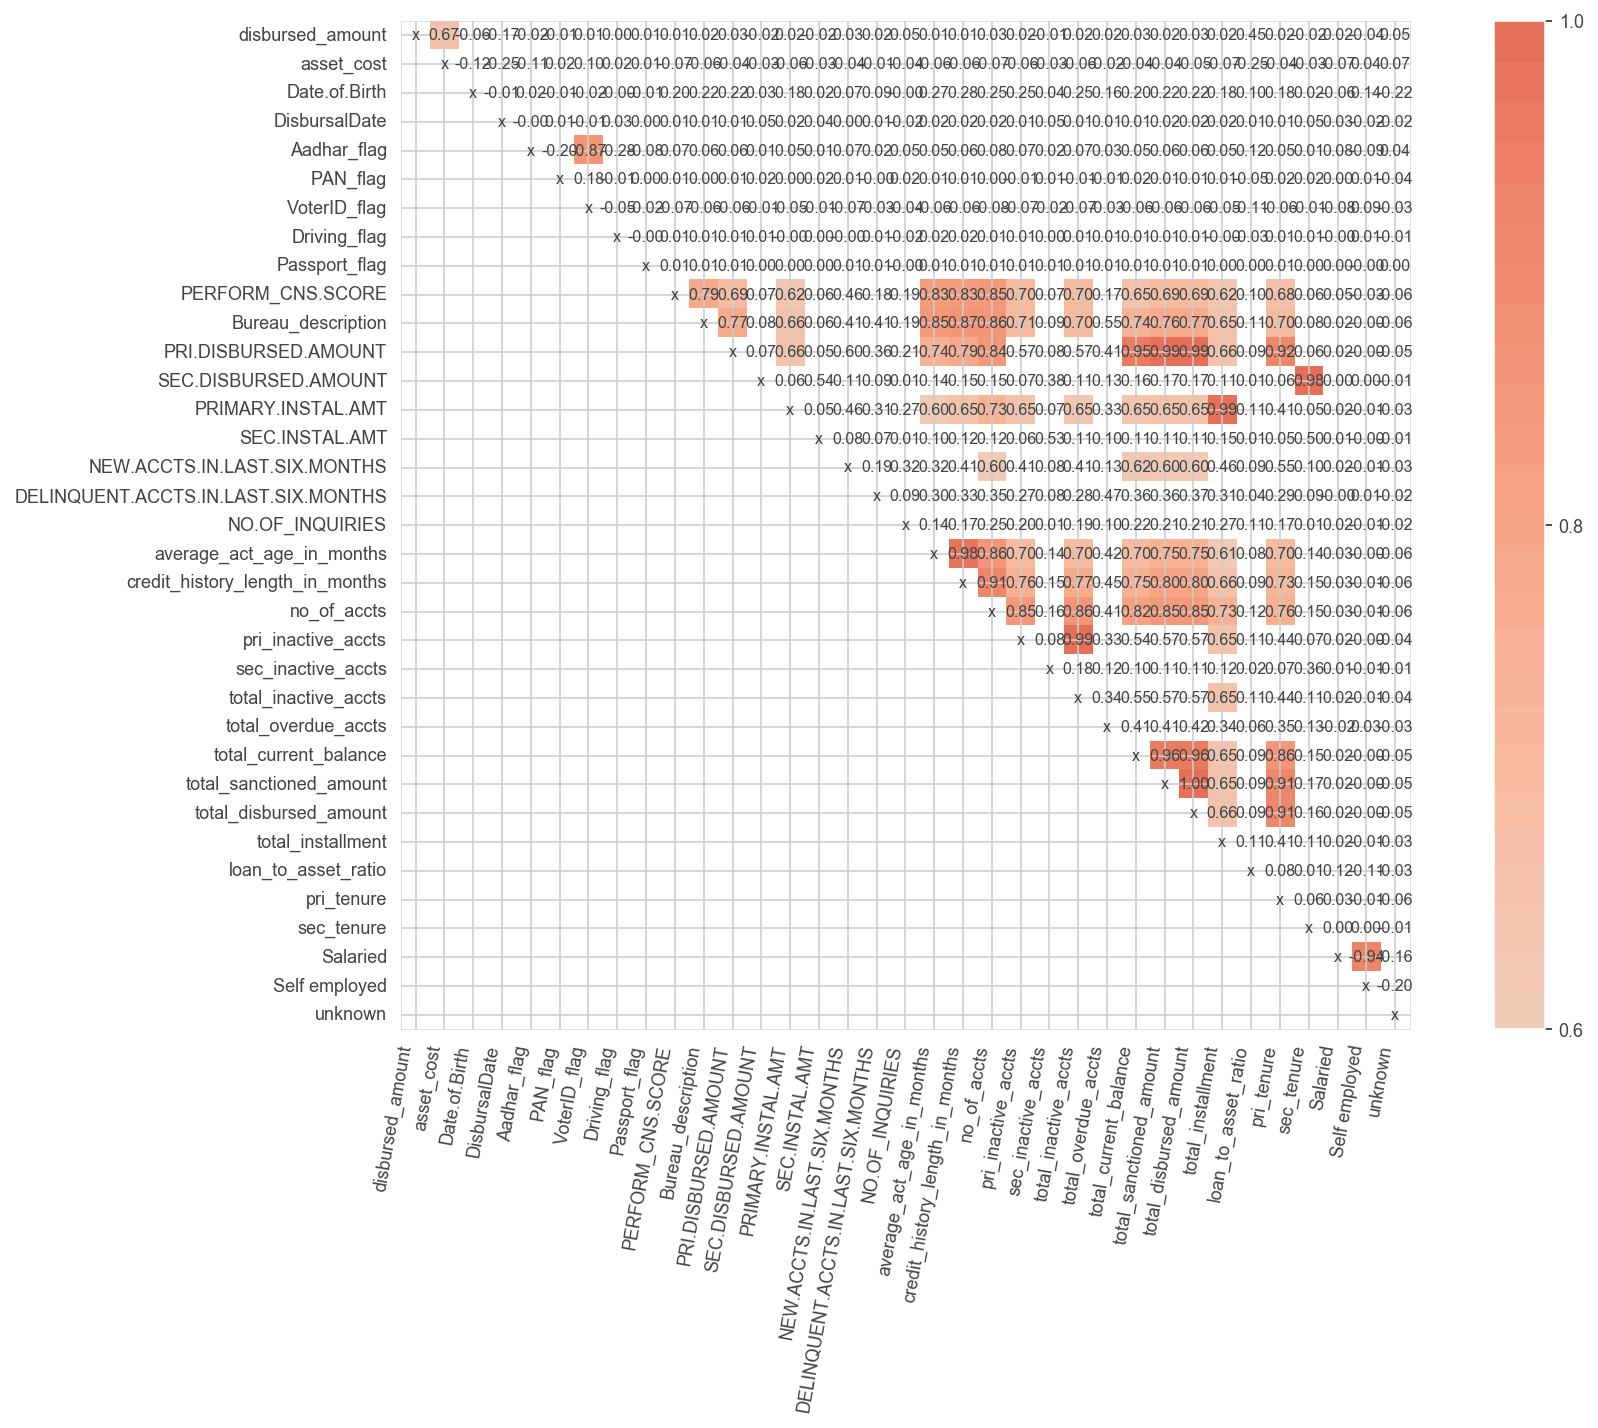

In [23]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X_train, figsize=(15,10))
viz.view()

In [24]:
def r2(rf, X_train, y_train):
    return r2_score(y_train, rfc_gs.predict(X_train))

perm_imp_rfpimp = permutation_importances(rfc_gs, X_train, y_train, r2)
perm_imp_rfpimp.reset_index(drop = False, inplace = True)

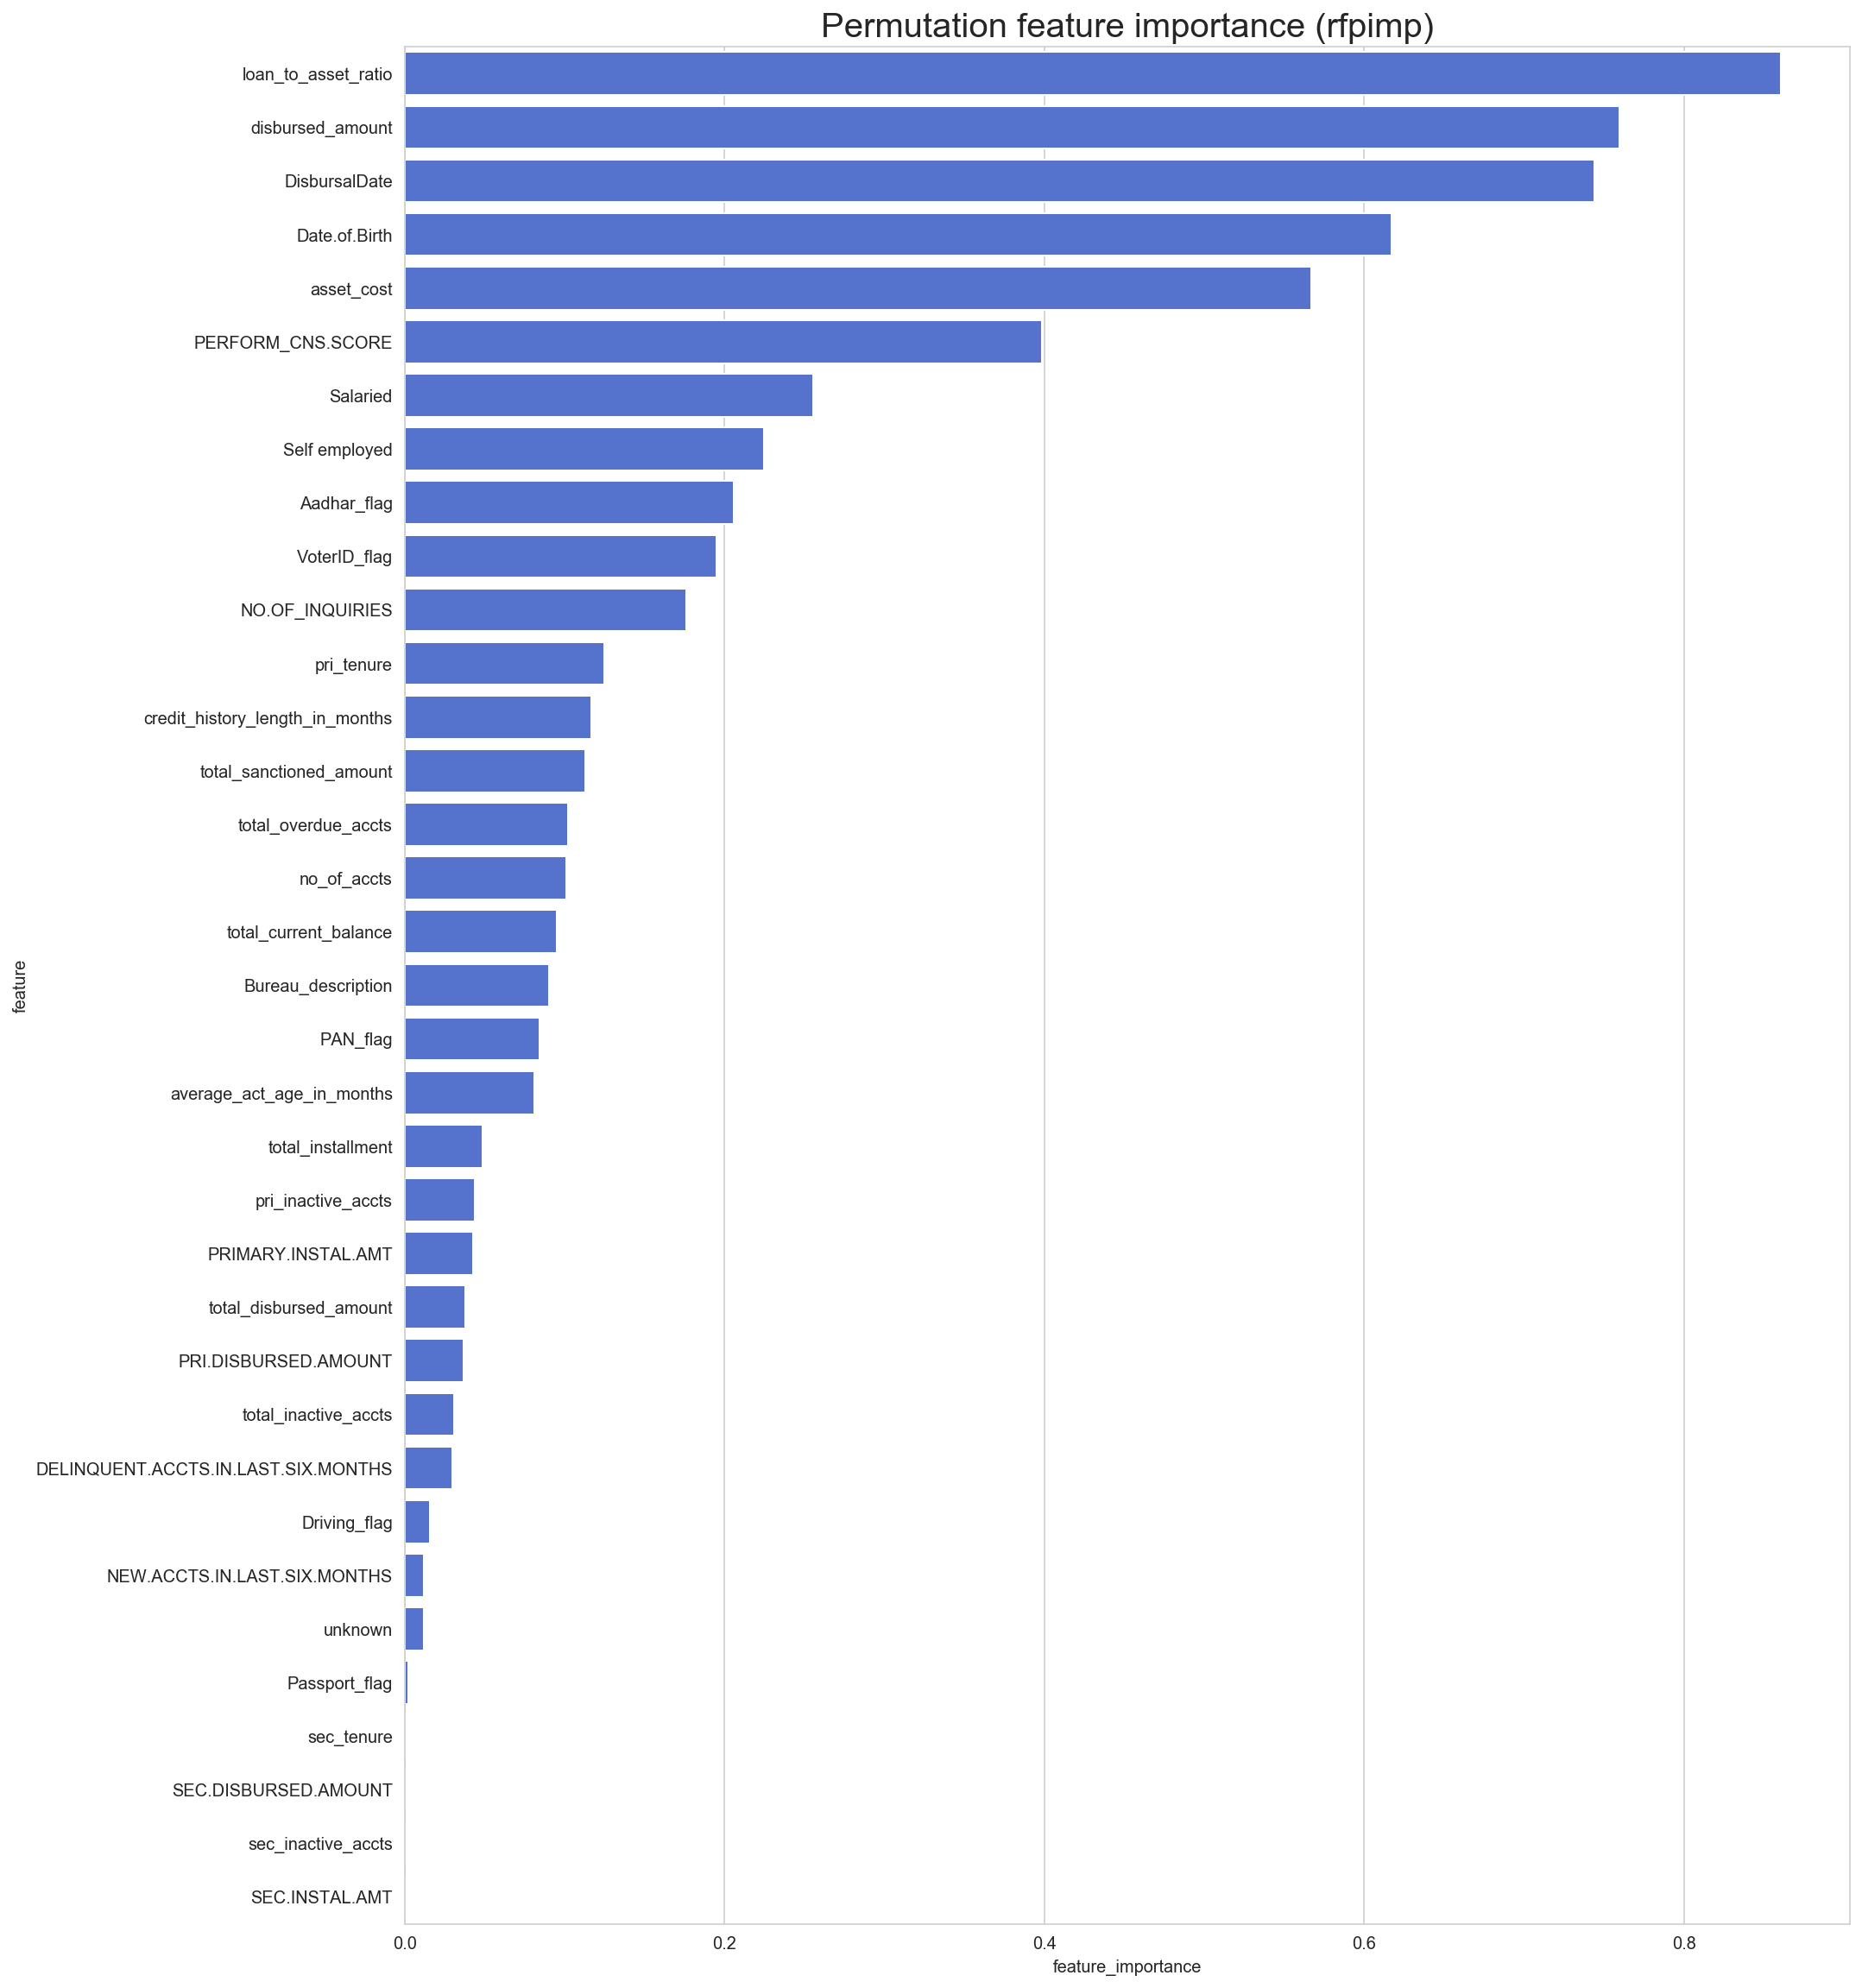

In [25]:
fig = plt.figure(figsize=(15,20))
var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')


In [26]:
import eli5
# let's check the importance of each attributes

from eli5.sklearn import PermutationImportance


perm = PermutationImportance(rfc_gs, random_state = 0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.0012 ± 0.0007,DisbursalDate
0.0004 ± 0.0005,NO.OF_INQUIRIES
0.0003 ± 0.0002,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
0.0001 ± 0.0001,SEC.INSTAL.AMT
0.0000 ± 0.0004,PAN_flag
0.0000 ± 0.0001,sec_inactive_accts
0.0000 ± 0.0001,SEC.DISBURSED.AMOUNT
0.0000 ± 0.0000,Passport_flag
-0.0000 ± 0.0001,sec_tenure
-0.0000 ± 0.0008,Date.of.Birth


## KNN Classifier ##

In [27]:
#train model KNN
knn = KNeighborsClassifier()
knn = train_model(knn)

accuracy_score 0.7423387875018764
recall_score 0.10616505810518022
f1_score 0.15214169783360382
roc_auc_score 0.5127968695959462
confusion_matrix
       0     1
0  33538  2939
1   9076  1078


## Decission Tree ##

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = train_model(dtc)

accuracy_score 0.6668954129227338
recall_score 0.2731928304116604
f1_score 0.2631753711873251
roc_auc_score 0.524841062517835
confusion_matrix
       0     1
0  28324  8153
1   7380  2774


**Naive Bayes**

In [29]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB = train_model(NB)

accuracy_score 0.7701100126525273
recall_score 0.006696868229269254
f1_score 0.012527634487840826
roc_auc_score 0.4946580264604964
confusion_matrix
       0    1
0  35843  634
1  10086   68


**AdaBoost Classifier**

In [30]:
# import modules as necessary
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
# Create adaboost-decision tree classifer object
Adaboost = AdaBoostClassifier()
Adaboost = train_model(Adaboost)

accuracy_score 0.7823336407111149
recall_score 0.010242269056529446
f1_score 0.02008109673682178
roc_auc_score 0.5037504077689369
confusion_matrix
       0    1
0  36377  100
1  10050  104


**Gradient Boosting**

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier()
GBM = train_model (GBM)

accuracy_score 0.7823550856726212
recall_score 0.004234784321449675
f1_score 0.008402540302882268
roc_auc_score 0.5015965159921802
confusion_matrix
       0   1
0  36439  38
1  10111  43


**Cat Boost**

In [33]:
#importing library and building model
from catboost import CatBoostClassifier
catmodel=CatBoostClassifier()
catmodel = train_model (catmodel)

Learning rate set to 0.096059
0:	learn: 0.6581817	total: 123ms	remaining: 2m 3s
1:	learn: 0.6308080	total: 148ms	remaining: 1m 13s
2:	learn: 0.6073929	total: 182ms	remaining: 1m
3:	learn: 0.5879351	total: 207ms	remaining: 51.6s
4:	learn: 0.5728361	total: 233ms	remaining: 46.3s
5:	learn: 0.5609088	total: 258ms	remaining: 42.7s
6:	learn: 0.5509989	total: 284ms	remaining: 40.3s
7:	learn: 0.5432194	total: 307ms	remaining: 38.1s
8:	learn: 0.5369153	total: 332ms	remaining: 36.5s
9:	learn: 0.5314508	total: 355ms	remaining: 35.1s
10:	learn: 0.5271863	total: 378ms	remaining: 34s
11:	learn: 0.5237037	total: 405ms	remaining: 33.3s
12:	learn: 0.5208177	total: 430ms	remaining: 32.6s
13:	learn: 0.5182388	total: 454ms	remaining: 31.9s
14:	learn: 0.5161375	total: 478ms	remaining: 31.4s
15:	learn: 0.5143599	total: 503ms	remaining: 30.9s
16:	learn: 0.5128238	total: 528ms	remaining: 30.5s
17:	learn: 0.5115520	total: 552ms	remaining: 30.1s
18:	learn: 0.5103591	total: 577ms	remaining: 29.8s
19:	learn: 0.50

166:	learn: 0.4938000	total: 4.47s	remaining: 22.3s
167:	learn: 0.4937599	total: 4.49s	remaining: 22.2s
168:	learn: 0.4936935	total: 4.52s	remaining: 22.2s
169:	learn: 0.4936533	total: 4.54s	remaining: 22.2s
170:	learn: 0.4936019	total: 4.57s	remaining: 22.1s
171:	learn: 0.4935557	total: 4.59s	remaining: 22.1s
172:	learn: 0.4935251	total: 4.62s	remaining: 22.1s
173:	learn: 0.4934679	total: 4.64s	remaining: 22.1s
174:	learn: 0.4934280	total: 4.67s	remaining: 22s
175:	learn: 0.4933797	total: 4.7s	remaining: 22s
176:	learn: 0.4933397	total: 4.73s	remaining: 22s
177:	learn: 0.4933017	total: 4.75s	remaining: 21.9s
178:	learn: 0.4932854	total: 4.78s	remaining: 21.9s
179:	learn: 0.4932559	total: 4.8s	remaining: 21.9s
180:	learn: 0.4932214	total: 4.83s	remaining: 21.8s
181:	learn: 0.4931805	total: 4.85s	remaining: 21.8s
182:	learn: 0.4931458	total: 4.88s	remaining: 21.8s
183:	learn: 0.4931171	total: 4.9s	remaining: 21.7s
184:	learn: 0.4930719	total: 4.93s	remaining: 21.7s
185:	learn: 0.4930261

331:	learn: 0.4876298	total: 9.63s	remaining: 19.4s
332:	learn: 0.4875978	total: 9.67s	remaining: 19.4s
333:	learn: 0.4875582	total: 9.71s	remaining: 19.4s
334:	learn: 0.4875320	total: 9.76s	remaining: 19.4s
335:	learn: 0.4874819	total: 9.81s	remaining: 19.4s
336:	learn: 0.4874380	total: 9.85s	remaining: 19.4s
337:	learn: 0.4874267	total: 9.89s	remaining: 19.4s
338:	learn: 0.4873813	total: 9.91s	remaining: 19.3s
339:	learn: 0.4873431	total: 9.94s	remaining: 19.3s
340:	learn: 0.4872982	total: 9.97s	remaining: 19.3s
341:	learn: 0.4872563	total: 10s	remaining: 19.2s
342:	learn: 0.4872189	total: 10s	remaining: 19.2s
343:	learn: 0.4871848	total: 10.1s	remaining: 19.2s
344:	learn: 0.4871522	total: 10.1s	remaining: 19.2s
345:	learn: 0.4871314	total: 10.1s	remaining: 19.2s
346:	learn: 0.4870929	total: 10.2s	remaining: 19.1s
347:	learn: 0.4870384	total: 10.2s	remaining: 19.1s
348:	learn: 0.4869868	total: 10.2s	remaining: 19.1s
349:	learn: 0.4869436	total: 10.3s	remaining: 19.1s
350:	learn: 0.48

494:	learn: 0.4824257	total: 14.6s	remaining: 14.8s
495:	learn: 0.4823959	total: 14.6s	remaining: 14.8s
496:	learn: 0.4823751	total: 14.6s	remaining: 14.8s
497:	learn: 0.4823461	total: 14.6s	remaining: 14.8s
498:	learn: 0.4823083	total: 14.7s	remaining: 14.7s
499:	learn: 0.4822689	total: 14.7s	remaining: 14.7s
500:	learn: 0.4822294	total: 14.7s	remaining: 14.7s
501:	learn: 0.4821980	total: 14.7s	remaining: 14.6s
502:	learn: 0.4821740	total: 14.8s	remaining: 14.6s
503:	learn: 0.4821350	total: 14.8s	remaining: 14.6s
504:	learn: 0.4820932	total: 14.8s	remaining: 14.5s
505:	learn: 0.4820550	total: 14.9s	remaining: 14.5s
506:	learn: 0.4820328	total: 14.9s	remaining: 14.5s
507:	learn: 0.4819927	total: 14.9s	remaining: 14.4s
508:	learn: 0.4819608	total: 14.9s	remaining: 14.4s
509:	learn: 0.4819357	total: 15s	remaining: 14.4s
510:	learn: 0.4819086	total: 15s	remaining: 14.4s
511:	learn: 0.4819060	total: 15s	remaining: 14.3s
512:	learn: 0.4818814	total: 15.1s	remaining: 14.3s
513:	learn: 0.4818

654:	learn: 0.4778927	total: 19.1s	remaining: 10.1s
655:	learn: 0.4778813	total: 19.2s	remaining: 10.1s
656:	learn: 0.4778474	total: 19.2s	remaining: 10s
657:	learn: 0.4778178	total: 19.3s	remaining: 10s
658:	learn: 0.4777928	total: 19.3s	remaining: 9.98s
659:	learn: 0.4777636	total: 19.3s	remaining: 9.96s
660:	learn: 0.4777367	total: 19.4s	remaining: 9.94s
661:	learn: 0.4777118	total: 19.4s	remaining: 9.91s
662:	learn: 0.4776884	total: 19.4s	remaining: 9.88s
663:	learn: 0.4776578	total: 19.5s	remaining: 9.85s
664:	learn: 0.4776309	total: 19.5s	remaining: 9.82s
665:	learn: 0.4776153	total: 19.5s	remaining: 9.79s
666:	learn: 0.4775814	total: 19.6s	remaining: 9.77s
667:	learn: 0.4775543	total: 19.6s	remaining: 9.76s
668:	learn: 0.4775379	total: 19.7s	remaining: 9.75s
669:	learn: 0.4775177	total: 19.8s	remaining: 9.73s
670:	learn: 0.4774772	total: 19.8s	remaining: 9.7s
671:	learn: 0.4774422	total: 19.8s	remaining: 9.67s
672:	learn: 0.4773941	total: 19.9s	remaining: 9.65s
673:	learn: 0.477

815:	learn: 0.4733770	total: 24.4s	remaining: 5.49s
816:	learn: 0.4733674	total: 24.4s	remaining: 5.46s
817:	learn: 0.4733434	total: 24.4s	remaining: 5.43s
818:	learn: 0.4733194	total: 24.4s	remaining: 5.4s
819:	learn: 0.4732852	total: 24.5s	remaining: 5.38s
820:	learn: 0.4732608	total: 24.5s	remaining: 5.35s
821:	learn: 0.4732498	total: 24.6s	remaining: 5.32s
822:	learn: 0.4732225	total: 24.6s	remaining: 5.29s
823:	learn: 0.4731882	total: 24.6s	remaining: 5.26s
824:	learn: 0.4731619	total: 24.6s	remaining: 5.23s
825:	learn: 0.4731398	total: 24.7s	remaining: 5.2s
826:	learn: 0.4731111	total: 24.7s	remaining: 5.17s
827:	learn: 0.4730824	total: 24.7s	remaining: 5.14s
828:	learn: 0.4730566	total: 24.8s	remaining: 5.11s
829:	learn: 0.4730341	total: 24.8s	remaining: 5.08s
830:	learn: 0.4730093	total: 24.8s	remaining: 5.05s
831:	learn: 0.4729860	total: 24.9s	remaining: 5.02s
832:	learn: 0.4729712	total: 24.9s	remaining: 4.99s
833:	learn: 0.4729577	total: 24.9s	remaining: 4.96s
834:	learn: 0.

976:	learn: 0.4694169	total: 29.4s	remaining: 692ms
977:	learn: 0.4693973	total: 29.4s	remaining: 662ms
978:	learn: 0.4693818	total: 29.5s	remaining: 632ms
979:	learn: 0.4693628	total: 29.5s	remaining: 602ms
980:	learn: 0.4693212	total: 29.5s	remaining: 572ms
981:	learn: 0.4693007	total: 29.5s	remaining: 541ms
982:	learn: 0.4692768	total: 29.6s	remaining: 511ms
983:	learn: 0.4692598	total: 29.6s	remaining: 481ms
984:	learn: 0.4692372	total: 29.6s	remaining: 451ms
985:	learn: 0.4692088	total: 29.7s	remaining: 421ms
986:	learn: 0.4691795	total: 29.7s	remaining: 391ms
987:	learn: 0.4691655	total: 29.7s	remaining: 361ms
988:	learn: 0.4691413	total: 29.7s	remaining: 331ms
989:	learn: 0.4690963	total: 29.8s	remaining: 301ms
990:	learn: 0.4690691	total: 29.8s	remaining: 271ms
991:	learn: 0.4690507	total: 29.8s	remaining: 241ms
992:	learn: 0.4690252	total: 29.9s	remaining: 210ms
993:	learn: 0.4690065	total: 29.9s	remaining: 180ms
994:	learn: 0.4689832	total: 29.9s	remaining: 150ms
995:	learn: 

## Conclusions:

Catboosting model has shown higher accuracy score, recall score, f1 score, roc-auc score. Important predictors of loan default are loan to asset ratio, disbursed amount, disbursal date, DOB, asset cost, perform CNS score(credit score).